In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [122]:
cat = '3FGL'
folder = '../ML_3FGL_paper/SOM'
cat_fn = '%s/%s_prob_catalog.csv' % (folder, cat)
cat_df = pd.read_csv(cat_fn, index_col=0)
labels = ['AGN', 'PSR', 'MIXED']
plots_folder = 'plots/Accuracies'
print(cat_df.columns)

Index(['Ln_Flux_Density', 'Ln_Unc_Energy_Flux100', 'Spectral_Index',
       'Ln_Signif_Curve', 'Ln_Variability_Index', 'HR12', 'HR23', 'HR34',
       'HR45', 'GLAT', 'Category_3FGL', 'CLASS_3FGL', 'Pivot_Energy',
       'Spectrum_Type', 'ASSOC1', 'AGN_BDT', 'PSR_BDT', 'AGN_NN', 'PSR_NN',
       'AGN_LR', 'PSR_LR', 'AGN_RF', 'PSR_RF', 'Times_in_Testing', 'Flags',
       'Category_Prob', 'GLON'],
      dtype='object')


In [123]:
sin_glat = np.abs(np.sin(np.deg2rad(cat_df['GLAT'])))

In [124]:
nbins = 10
sin_bins = np.linspace(0, 1, nbins + 1)**1.5
sin_bins_c = (sin_bins[1:] + sin_bins[:-1]) / 2

In [125]:
masks = {}
masks['AGN & PSR'] = (cat_df['Category_%s' % cat] == 'AGN') | (cat_df['Category_%s' % cat] == 'PSR')
masks['AGN'] = (cat_df['Category_%s' % cat] == 'AGN')
masks['PSR'] = (cat_df['Category_%s' % cat] == 'PSR')



In [139]:
res = {}
res_prec = {}
nsrc = {}
nsrc_prec = {}
for key in masks.keys():
    res[key] = np.zeros(nbins)
    res_prec[key] = np.zeros(nbins)
    nsrc[key] = np.zeros(nbins)
    nsrc_prec[key] = np.zeros(nbins)

save figure to file: plots/Accuracies/All algs_3FGL.pdf
save figure to file: plots/Accuracies/source_counts_All algs_3FGL.pdf
save figure to file: plots/Accuracies/NN_3FGL.pdf
save figure to file: plots/Accuracies/source_counts_NN_3FGL.pdf
save figure to file: plots/Accuracies/LR_3FGL.pdf
save figure to file: plots/Accuracies/source_counts_LR_3FGL.pdf
save figure to file: plots/Accuracies/RF_3FGL.pdf
save figure to file: plots/Accuracies/source_counts_RF_3FGL.pdf
save figure to file: plots/Accuracies/BDT_3FGL.pdf
save figure to file: plots/Accuracies/source_counts_BDT_3FGL.pdf


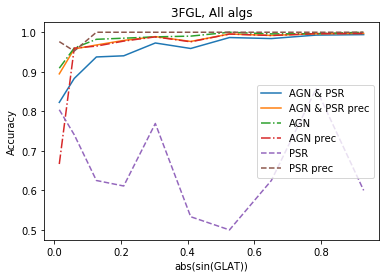

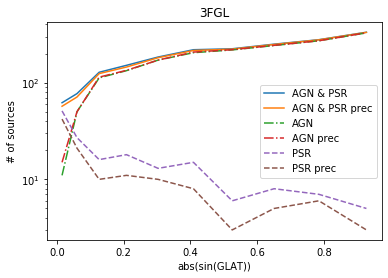

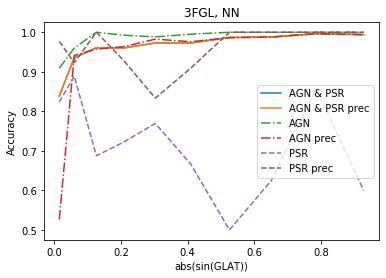

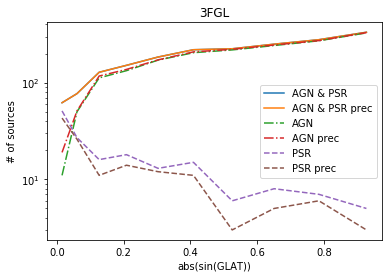

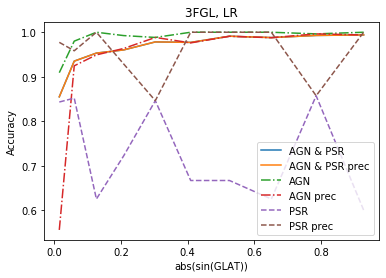

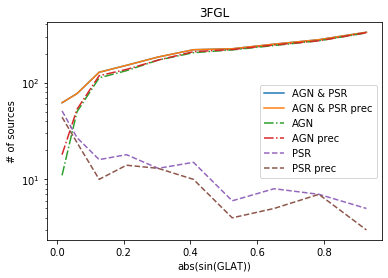

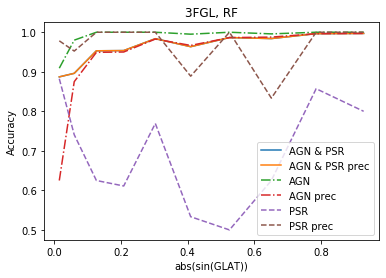

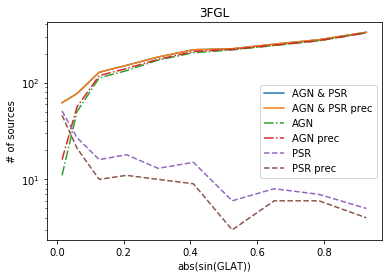

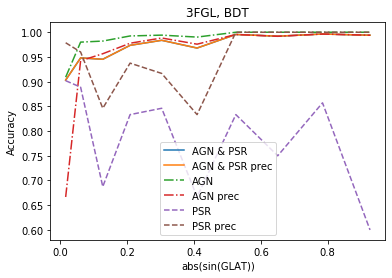

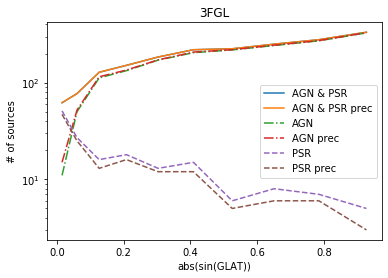

In [140]:
#alg = 'All algs'
algs = ['All algs', 'NN', 'LR', 'RF', 'BDT']
save_plots = True
for alg in algs:
    masks_prec = {}
    if alg == 'All algs':
        masks_prec['AGN & PSR'] = (cat_df['Category_Prob'] == 'AGN') | (cat_df['Category_Prob'] == 'PSR')
        masks_prec['AGN'] = (cat_df['Category_Prob'] == 'AGN')
        masks_prec['PSR'] = (cat_df['Category_Prob'] == 'PSR')
    else:
        masks_prec['AGN & PSR'] = (cat_df['AGN_%s' % alg] > 0.5) | (cat_df['PSR_%s' % alg] > 0.5)
        masks_prec['AGN'] = (cat_df['AGN_%s' % alg] > 0.5)
        masks_prec['PSR'] = (cat_df['PSR_%s' % alg] > 0.5)
        
    for i in range(nbins):
        for key in masks.keys():
            bin_mask = (sin_glat > sin_bins[i]) & (sin_glat <= sin_bins[i + 1]) & masks[key]
            y_true = cat_df['Category_%s' % cat][bin_mask]
            if alg == 'All algs':
                y_pred = cat_df['Category_Prob'][bin_mask]
            else:
                y_pred = y_true.copy()
                y_pred[:] = 'PSR'
                agn_mask = cat_df['AGN_%s' % alg][bin_mask] > 0.5
                y_pred[agn_mask] = 'AGN'
            res[key][i] = accuracy_score(y_true, y_pred)
            nsrc[key][i] = np.sum(bin_mask)
            
            bin_mask = (sin_glat > sin_bins[i]) & (sin_glat <= sin_bins[i + 1]) & masks_prec[key] & masks['AGN & PSR']
            y_true = cat_df['Category_%s' % cat][bin_mask]
            if alg == 'All algs':
                y_pred = cat_df['Category_Prob'][bin_mask]
            else:
                y_pred = y_true.copy()
                y_pred[:] = 'PSR'
                agn_mask = cat_df['AGN_%s' % alg][bin_mask] > 0.5
                y_pred[agn_mask] = 'AGN'
            res_prec[key][i] = accuracy_score(y_true, y_pred)
            nsrc_prec[key][i] = np.sum(bin_mask)
            
    lss = ['-', '-.', '--']
    pyplot.figure()
    for i, key in enumerate(masks.keys()):
        pyplot.plot(sin_bins_c, res[key], ls=lss[i], label=key)
        pyplot.plot(sin_bins_c, res_prec[key], ls=lss[i], label=key + ' prec')
    pyplot.xlabel('abs(sin(GLAT))')
    pyplot.ylabel('Accuracy')
    pyplot.title('%s, %s' % (cat, alg))
    pyplot.legend()

    if save_plots:
        fn = '%s/%s_%s.pdf' % (plots_folder, alg, cat)
        print('save figure to file: %s' % fn)
        pyplot.savefig(fn)

    pyplot.figure()
    for i, key in enumerate(masks.keys()):
        pyplot.semilogy(sin_bins_c, nsrc[key], ls=lss[i], label=key)
        pyplot.semilogy(sin_bins_c, nsrc_prec[key], ls=lss[i], label=key + ' prec')
    pyplot.xlabel('abs(sin(GLAT))')
    pyplot.ylabel('# of sources')
    pyplot.title('%s' % (cat))
    pyplot.legend()

    if save_plots:
        fn = '%s/source_counts_%s_%s.pdf' % (plots_folder, alg, cat)
        print('save figure to file: %s' % fn)
        pyplot.savefig(fn)


In [88]:
res

{'AGN & PSR': array([0.92982456, 0.97202797, 0.9825784 , 0.97855228, 0.99127907,
        0.98579545, 0.97814208, 0.99189189, 0.9947644 , 1.        ]),
 'AGN': array([0.94936709, 0.9921875 , 0.99256506, 0.99150142, 1.        ,
        0.99710145, 0.98879552, 0.99725275, 1.        , 1.        ]),
 'PSR': array([0.90551181, 0.8       , 0.83333333, 0.75      , 0.75      ,
        0.42857143, 0.55555556, 0.66666667, 0.75      , 1.        ])}